In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.linear_model import SGDRegressor

from pandas.tools.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
%matplotlib inline

In [3]:
train=pd.read_table('ex1data2.txt',sep=',',header=None,names=['house_size','beds_num','price'])

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
house_size    47 non-null int64
beds_num      47 non-null int64
price         47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [5]:
train.head()

,house_size,beds_num,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
train.describe()

,house_size,beds_num,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3137744e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3136d1b518>]], dtype=object)

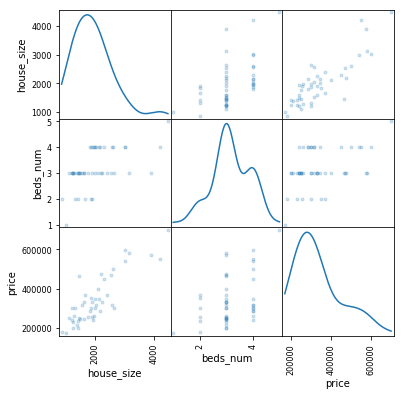

In [7]:
scatter_matrix(train, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [8]:
stdscale=StandardScaler()
X=stdscale.fit_transform(train[['house_size','beds_num']])
y=train['price']

learning_rate : string, optional
The learning rate schedule:
‘constant’: eta = eta0
‘optimal’: eta = 1.0 / (alpha * (t + t0)) [default]
‘invscaling’: eta = eta0 / pow(t, power_t)

****************************
SGD constant
****************************
SGD optimal
****************************
SGD invscaling


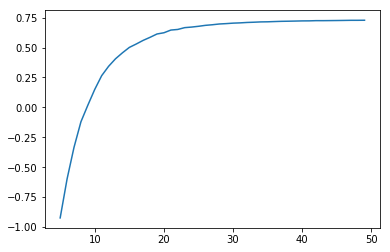

In [38]:
learning_rate_list=['constant','optimal','invscaling']

rate_iter=[]
rate_iter=pd.DataFrame(columns=['learning_rate','n_iter','r2_score'])

for lrl in learning_rate_list:
    print("****************************")
    print("SGD "+lrl)
    for i in range(5,50):
        estimator=SGDRegressor(learning_rate=lrl,n_iter=i)
        model=estimator.fit(X,y)
        predictions=model.predict(X)
        temp_df=pd.DataFrame({'learning_rate':[lrl],
                             'n_iter': [i],
                             'r2_score':[r2_score(y,predictions)]
                             })
        rate_iter=rate_iter.append(temp_df)
        
learning_rate = 'invscaling'

df_f=rate_iter[rate_iter['learning_rate']==learning_rate]
plt.plot(df_f['n_iter'],df_f['r2_score'])        